# Plotting ADCP Data

This notebook was adapted from Dr. Nick Beird's class with his permission. Thanks, Nick!

In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #coordinate reference system
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('os150bb.nc').transpose()
#.transpose will switch the x and y coordinates, like transposing an array
ds

<xarray.Dataset>
Dimensions:     (time: 4037, depth_cell: 30)
Coordinates:
  * time        (time) datetime64[ns] 2017-08-07T06:18:17 ... 2017-08-21T19:1...
Dimensions without coordinates: depth_cell
Data variables: (12/14)
    trajectory  int32 ...
    lon         (time) float64 ...
    lat         (time) float64 ...
    depth       (depth_cell, time) float32 ...
    u           (depth_cell, time) float32 ...
    v           (depth_cell, time) float32 ...
    ...          ...
    pflag       (depth_cell, time) int8 ...
    heading     (time) float32 ...
    tr_temp     (time) float32 ...
    num_pings   (time) int8 ...
    uship       (time) float32 ...
    vship       (time) float32 ...
Attributes:
    featureType:                    trajectoryProfile
    history:                        Created: 2017-08-21 19:17:24 UTC
    Conventions:                    COARDS
    software:                       pycurrents
    hg_changeset:                   2330:6e8f1f6f8016
    title:                          Shipboard ADCP velocity profiles
    description:                    Shipboard ADCP velocity profiles from SKQ...
    cruise_id:                      SKQ201712S
    sonar:                          os150bb
    CODAS_oceanographic_variables:  \nCommon Oceanographic Data Analysis Syst...
    CODAS_processing_description:   \n\nCODAS processing note:\n=============...

Notice how our dataset `ds` has both dimensions and coordinates. These will come in handy! Lets make a plot to visualize the data we have here. We can use dot indexing to index variables within our dataset. Using the `.plot` function on our xarray dataset, we can plot the `u` variable (east/west velocity) in just a few lines of code. The default `.plot` will plot the indicated variable against the dimensions of the dataset. It will even label your axes for you!

(25.0, 0.0)

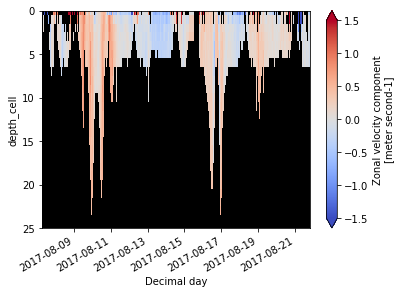

In [3]:
ds.u.plot(cmap='coolwarm', vmin = -1.5, vmax= 1.5)
ax = plt.gca()
ax.set_facecolor('k')
plt.ylim([25,0])

Notice that the colorbar is diverging becuase we have postive and negative values of `u`. Cannonically, postiive u is pointing eastward and negative u is pointing westward. <br>
Cool! But where in the world are we? Let's make an aerial track plot to find out.

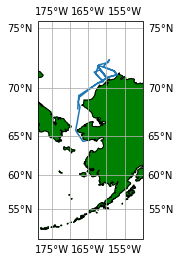

In [4]:
# 'Mercator' represents lat and lon on a more realistic globe
proj = ccrs.Mercator()
# PlateCarree is the projection that your xarray is currently on
data_crs = ccrs.PlateCarree()
# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

plt.plot( ds.lon, ds.lat, transform = data_crs ) # need to "transform" data from PlateCaree to Mercator
plt.xticks(rotation=45)

ax.coastlines()
ax.add_feature( cfeature.LAND, color='green' )

ax.gridlines(draw_labels=True)

ax.set_extent([-179, -150, 50, 75])

The track goes back and forth over the same transect (see those two deep canyons on our first plot?) <br>
We are going to select for just the first transect by indexing our xarray by time.

In [5]:
transect1 = ds.sel(time = slice('2017-08-16','2017-08-17 12:00:00'))
transect1

<xarray.Dataset>
Dimensions:     (time: 432, depth_cell: 30)
Coordinates:
  * time        (time) datetime64[ns] 2017-08-16T00:02:18 ... 2017-08-17T11:5...
Dimensions without coordinates: depth_cell
Data variables: (12/14)
    trajectory  int32 771010529
    lon         (time) float64 -158.9 -158.9 -158.9 ... -158.8 -158.8 -158.8
    lat         (time) float64 71.71 71.71 71.71 71.71 ... 71.7 71.7 71.71 71.71
    depth       (depth_cell, time) float32 ...
    u           (depth_cell, time) float32 ...
    v           (depth_cell, time) float32 ...
    ...          ...
    pflag       (depth_cell, time) int8 ...
    heading     (time) float32 87.28 87.28 86.85 87.56 ... -74.94 -75.86 -76.17
    tr_temp     (time) float32 4.642 4.646 4.666 4.678 ... 5.037 5.029 5.022
    num_pings   (time) int8 89 79 73 74 74 73 73 105 ... 79 83 83 81 81 82 81 81
    uship       (time) float32 0.01456 0.01367 -0.01188 ... -1.207 -1.187 -1.168
    vship       (time) float32 -0.03739 0.005183 -0.0135 ... 0.4489 0.4141
Attributes:
    featureType:                    trajectoryProfile
    history:                        Created: 2017-08-21 19:17:24 UTC
    Conventions:                    COARDS
    software:                       pycurrents
    hg_changeset:                   2330:6e8f1f6f8016
    title:                          Shipboard ADCP velocity profiles
    description:                    Shipboard ADCP velocity profiles from SKQ...
    cruise_id:                      SKQ201712S
    sonar:                          os150bb
    CODAS_oceanographic_variables:  \nCommon Oceanographic Data Analysis Syst...
    CODAS_processing_description:   \n\nCODAS processing note:\n=============...

We still have 30 depth cells in our dimensions list, but now we only have 432 timestamps.

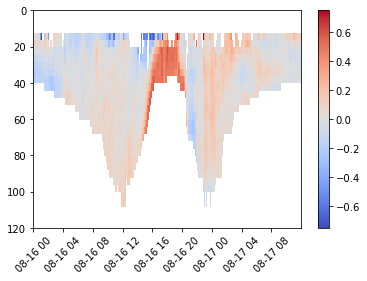

In [9]:
plt.pcolormesh(transect1.time.to_pandas(), transect1.depth[:,1], transect1.v, vmin=-.75, vmax=.75, cmap= 'coolwarm')
plt.colorbar()

plt.ylim([120,0])
plt.xticks(rotation = 45);

Now, we are going to slice our dataset in the other dimension to get just the top depth cell (the surface) and plot a vector map of surface velocities across this transect.

In [10]:
transect1.depth_cell # checking to see how the depth cells are indexed

<xarray.DataArray 'depth_cell' (depth_cell: 30)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
Dimensions without coordinates: depth_cell

In [11]:
surface_t1 = transect1.sel(depth_cell = 0) # select for the top bin of depth ##NOTE: you can only use '.sel' on ds dimensions
surface_t1.depth.values # make sure we chose the right bin (i.e. that 0 = surface and not 0 = bottom)

array([14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21, 14.21,
       14.21, 14.21,

In [12]:
surface_t1 # surface is now a dataset with one dimension

<xarray.Dataset>
Dimensions:     (time: 432)
Coordinates:
  * time        (time) datetime64[ns] 2017-08-16T00:02:18 ... 2017-08-17T11:5...
Data variables: (12/14)
    trajectory  int32 771010529
    lon         (time) float64 -158.9 -158.9 -158.9 ... -158.8 -158.8 -158.8
    lat         (time) float64 71.71 71.71 71.71 71.71 ... 71.7 71.7 71.71 71.71
    depth       (time) float32 ...
    u           (time) float32 ...
    v           (time) float32 ...
    ...          ...
    pflag       (time) int8 ...
    heading     (time) float32 87.28 87.28 86.85 87.56 ... -74.94 -75.86 -76.17
    tr_temp     (time) float32 4.642 4.646 4.666 4.678 ... 5.037 5.029 5.022
    num_pings   (time) int8 89 79 73 74 74 73 73 105 ... 79 83 83 81 81 82 81 81
    uship       (time) float32 0.01456 0.01367 -0.01188 ... -1.207 -1.187 -1.168
    vship       (time) float32 -0.03739 0.005183 -0.0135 ... 0.4489 0.4141
Attributes:
    featureType:                    trajectoryProfile
    history:                        Created: 2017-08-21 19:17:24 UTC
    Conventions:                    COARDS
    software:                       pycurrents
    hg_changeset:                   2330:6e8f1f6f8016
    title:                          Shipboard ADCP velocity profiles
    description:                    Shipboard ADCP velocity profiles from SKQ...
    cruise_id:                      SKQ201712S
    sonar:                          os150bb
    CODAS_oceanographic_variables:  \nCommon Oceanographic Data Analysis Syst...
    CODAS_processing_description:   \n\nCODAS processing note:\n=============...

Now that we have our indexed dataset, let's make a quiver plot. A quiver plot will convert the u and v components into a vector with magnitude and direction.

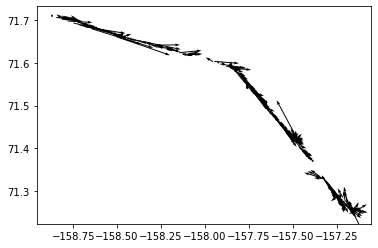

In [13]:
plt.quiver(surface_t1.lon, surface_t1.lat, surface_t1.u, surface_t1.v)

This plot looks a little busy, so I'm going to plot only every 10th datapoint.

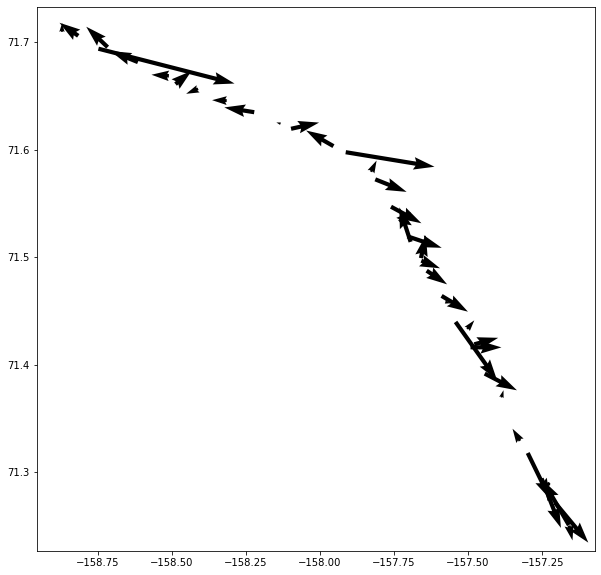

In [14]:
fig = plt.figure(figsize=(10.0, 10.0))

plt.quiver(surface_t1.lon[::10], surface_t1.lat[::10], surface_t1.u[::10], surface_t1.v[::10])

# Now it's your turn to make some plots

Plot a second transect over the same bathymetric features. <br>
Your second transect should be between '2017-08-09 16:00:00','2017-08-10 18:00:00' <br>
<br>
make the following plots: <br>
(1) cruise track of the second transect in relation to nearby landmasses <br>
(2) cross-section of the v component velocity <br>
(3) a quiver plot of the surface velocities of the second transect
<br>
<br>
How do the two transects differ?